In [1]:
import os
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [25]:
df = pd.read_csv(os.path.join('data', 'train.csv'), index_col=0)
df['Deck'] = df['Cabin'].dropna().str[0]

encs = {}
for col in ['Sex', 'Embarked', 'Deck']:
    encs[col] = LabelEncoder()
    df.loc[pd.isnull(df[col]), col]  = 'NaN'
    df[col] = encs[col].fit_transform(df[col])
    print(col, encs[col].classes_)

Sex ['female' 'male']
Embarked ['C' 'NaN' 'Q' 'S']
Deck ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'NaN' 'T']


In [48]:
df['Deck']

PassengerId
1      7
2      2
3      7
4      2
5      7
      ..
887    7
888    1
889    7
890    2
891    7
Name: Deck, Length: 891, dtype: int32

In [27]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,2.343434,5.946128
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,1.167398,2.062347
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,2.000000,7.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,3.000000,7.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,3.000000,7.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,8.000000


In [28]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.174963,-0.295113
Pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.197493,0.742093
Sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.106395,0.118635
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.039280,-0.267161
SibSp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,0.068043,0.041058
Parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,0.032517,-0.031553
Fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.246359,-0.525742
Embarked,-0.174963,0.197493,0.106395,-0.039280,0.068043,0.032517,-0.246359,1.000000,0.227505
Deck,-0.295113,0.742093,0.118635,-0.267161,0.041058,-0.031553,-0.525742,0.227505,1.000000


C:\ProgramData\Anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


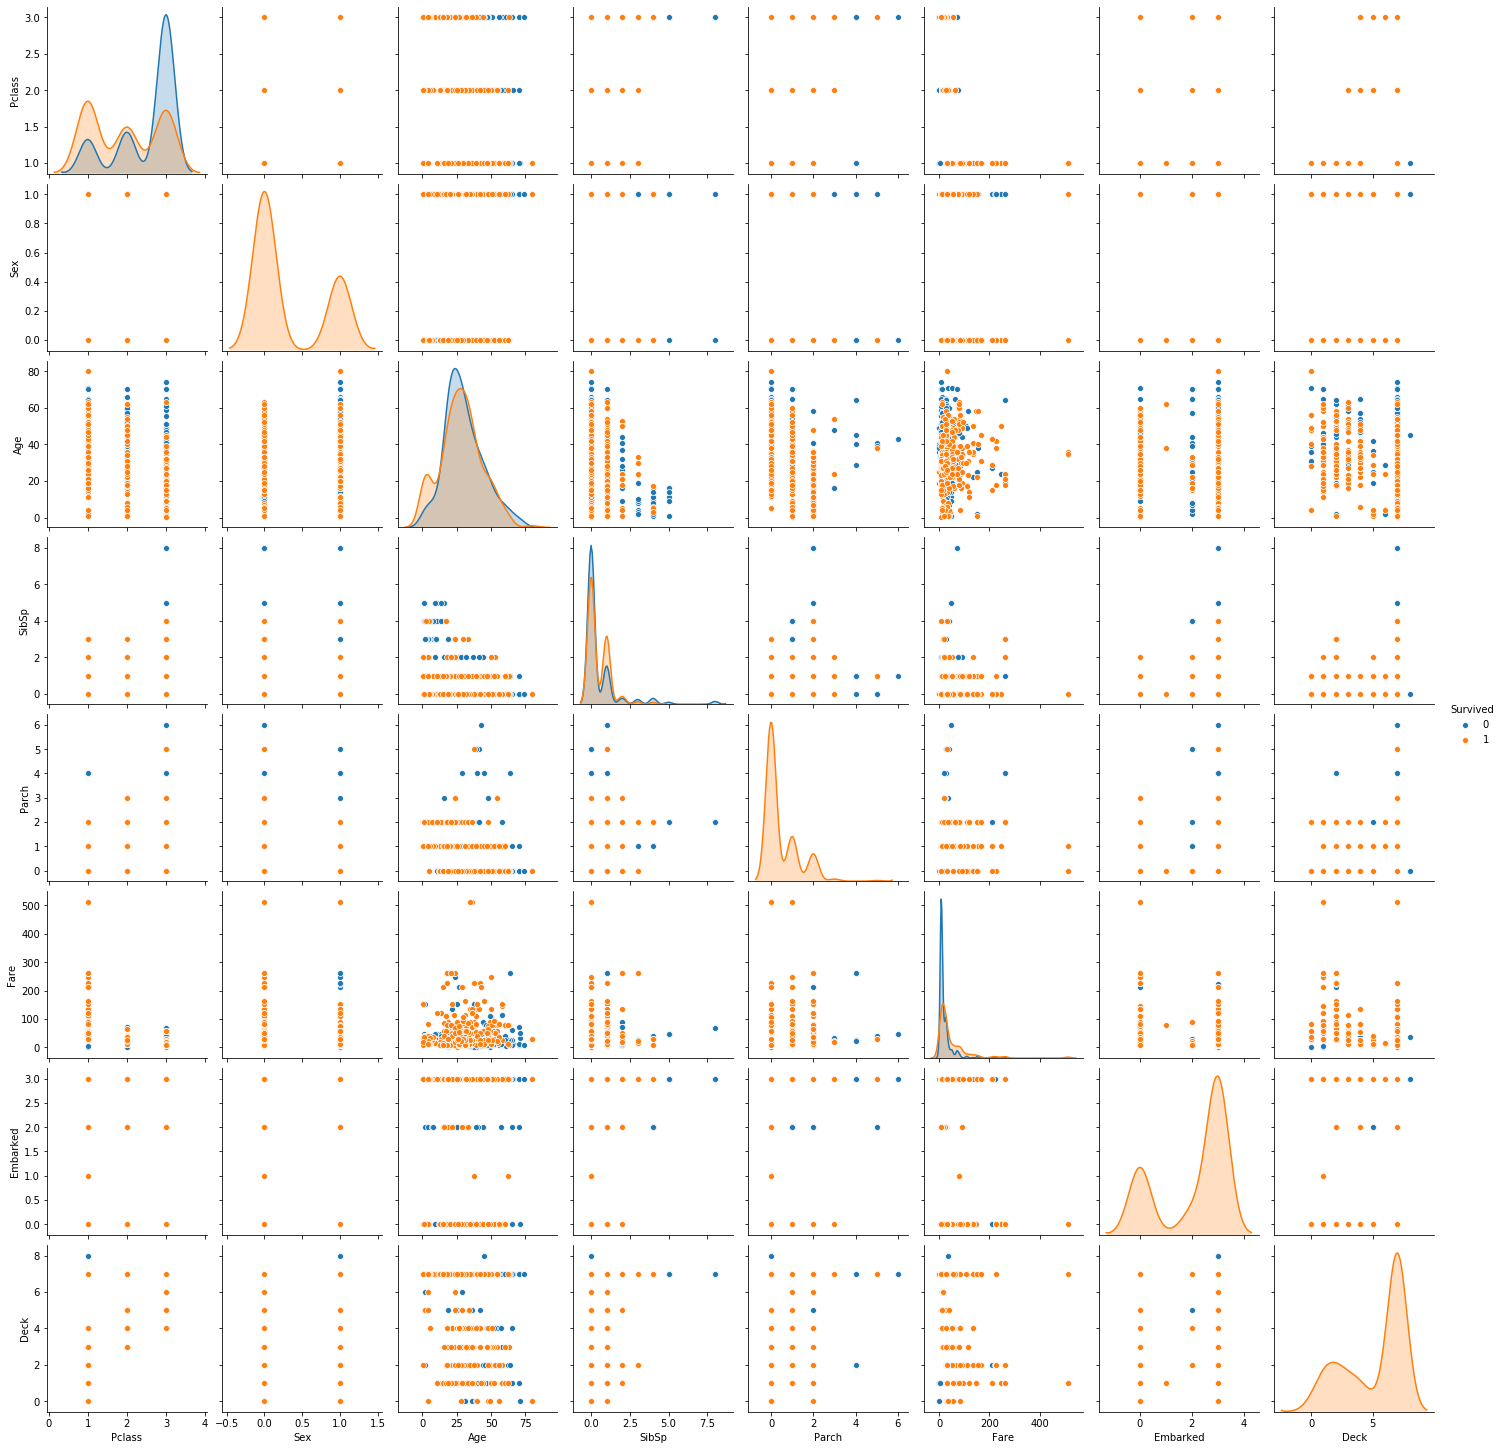

In [29]:
sns.pairplot(df, hue='Survived')